TO DO
- Imports
- Dataset get
- Data processing
- Hyper parameter
- Finish tuning
- Display data
- Display accuracy

## Imports

In [189]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


## Getting Dataset

In [190]:
data = pd.read_csv('merged_steam_data.csv')

data

,appid,name_x,price_x,ccu,name_y
0,10,52,999.0,16360,52
1,220,140,999.0,1177,140
2,240,53,999.0,7752,53
3,550,164,999.0,20328,164
4,620,225,199.0,2793,225
...,...,...,...,...,...
334,1593500,129,4999.0,12509,129
335,1677740,274,799.0,4423,274
336,1794680,319,299.0,52451,319
337,1832640,184,199.0,3505,184


## Data Processing

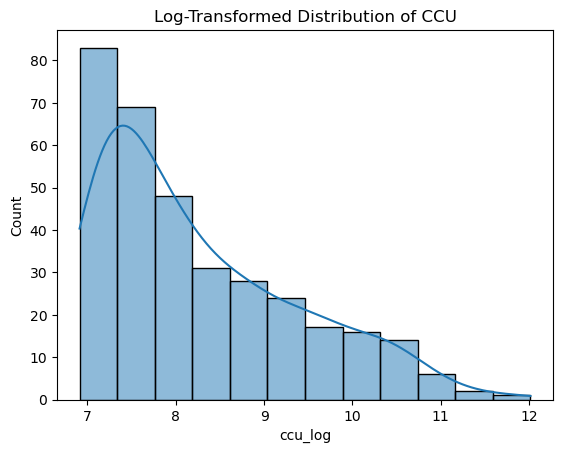

In [191]:
# Applying log transformation to the target variable
data['ccu_log'] = np.log1p(data['ccu'])  # log1p handles log(0) safely
sns.histplot(data['ccu_log'], kde=True)
plt.title('Log-Transformed Distribution of CCU')
plt.show()

x = data.drop(columns=['ccu_log'])
y = data['ccu_log']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Remove outliers beyond a certain threshold
threshold = data['ccu'].quantile(0.99) 
data = data[data['ccu'] <= threshold]


## Hyper-Param tuning

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'max_depth': 15, 'min_samples_split': 2}
Best cross-validation score: 0.0053
Mean Squared Error: 0.0006090546283048616
R^2 Score: 0.9994963229337941


Text(0.5, 1.0, 'CCU vs Price_x')

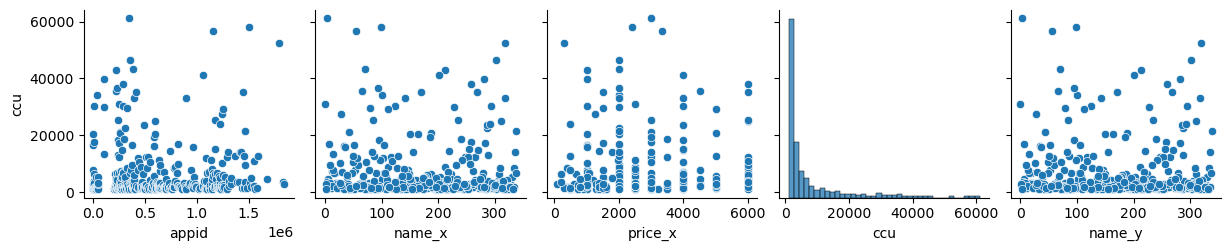

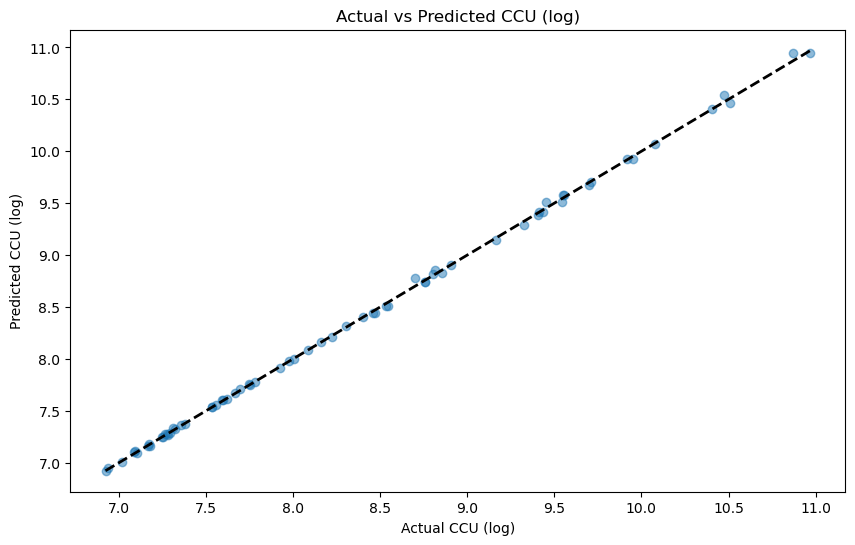

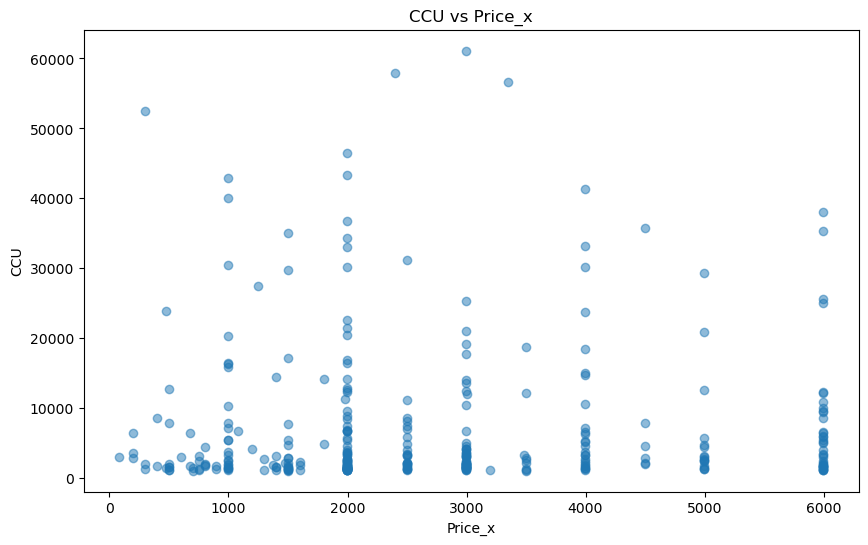

In [192]:
param_grid = {
    'max_depth': [3, 5, 10, 15, None],  # Depth of the tree
    'min_samples_split': [2, 5, 10, 20]  # Minimum samples required to split a node
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {-grid_search.best_score_:.4f}")

y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

sns.pairplot(data, x_vars=x.columns, y_vars=['ccu'], height=2.5)

# plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual CCU (log)')
plt.ylabel('Predicted CCU (log)')
plt.title('Actual vs Predicted CCU (log)')

# Plot just ccu vs price_x
plt.figure(figsize=(10, 6))
plt.scatter(data['price_x'], data['ccu'], alpha=0.5)
plt.xlabel('Price_x')
plt.ylabel('CCU')
plt.title('CCU vs Price_x')


## Testing for my own stuff